In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

# Resumen y analisis exploratorio 
* **Provincias con mas distribucion entre los años 1999 - 2002**

1-Neuquen.

2-Salta.

3-Tierra del fuego

----

* **Año en cual se distribuyo mas fue entre el 2000 y 2001**
----

* **Mes en que se distribuyo mas (teniendo en cuenta todos los años)**

1- Enero

2- Septiembre

3- Mayo

----

* **La provincia con el pico MAXIMO en deistribucion (cantidad) es SALTA - AGUARAGÜE**

In [92]:
data = pd.read_csv("../MisPracticas/Datasets/distribucion-de-gasolina-y-existencias-a-fin-de-mes-ant-2009.csv")
data.head(10)
# 1999 - 2002

,anio,mes,provincia,permisoconcesion,concepto,cantidad,fecha_data
0,1999,1,CHUBUT,CERRO NEGRO [CHUBUT],Mercado Interno - Combustible,0.0,1999-01-31
1,1999,1,CHUBUT,PAMPA DEL CASTILLO-LA GUITARRA,Mezclada con Crudo - Venta Interna,0.0,1999-01-31
2,1999,1,CHUBUT,CERRO NEGRO [CHUBUT],Mezclada con Crudo - Venta Interna,0.0,1999-01-31
3,1999,1,CHUBUT,CERRO NEGRO [CHUBUT],Mezclada con Crudo - Exportado,0.0,1999-01-31
4,1999,1,CHUBUT,CERRO NEGRO [CHUBUT],Exportaciones,0.0,1999-01-31
5,1999,1,CHUBUT,ANTICLINAL FUNES,Mercado Interno - Combustible,0.0,1999-01-31
6,1999,1,CHUBUT,ANTICLINAL FUNES,Mercado Interno -No Combustible,0.0,1999-01-31
7,1999,1,CHUBUT,ANTICLINAL FUNES,Mezclada con Crudo - Venta Interna,0.0,1999-01-31
8,1999,1,CHUBUT,ANTICLINAL FUNES,Mezclada con Crudo - Exportado,0.0,1999-01-31
9,1999,1,CHUBUT,DIADEMA,Mezclada con Crudo - Venta Interna,0.0,1999-01-31


In [44]:
data.shape

(18505, 7)

In [10]:
data.dtypes

anio                  int64
mes                   int64
provincia            object
permisoconcesion     object
concepto             object
cantidad            float64
fecha_data           object
dtype: object

In [15]:
datagrouped=(data.groupby(by=['provincia']).sum("cantidad"))
datagrouped.cantidad
dfM=dfgrouped.cantidad/1000000
dfM

provincia
CHUBUT                  0.013975
FORMOSA                 0.000000
JUJUY                   0.001603
LA PAMPA                0.015326
MENDOZA                 0.000000
NC (ESTADO NACIONAL)    0.004107
NEUQUÉN                 0.265805
RÍO NEGRO               0.023352
SALTA                   0.161397
SANTA CRUZ              0.026320
TIERRA DEL FUEGO        0.069962
Name: cantidad, dtype: float64

* la información relevante para nuestra empresa, cantidad de distribucion a cada provincia que contenga nuestro DF

In [18]:
dfM2=pd.DataFrame(dfM).reset_index()
dfM2

,provincia,cantidad
0,CHUBUT,0.013975
1,FORMOSA,0.000000
2,JUJUY,0.001603
3,LA PAMPA,0.015326
4,MENDOZA,0.000000
5,NC (ESTADO NACIONAL),0.004107
6,NEUQUÉN,0.265805
7,RÍO NEGRO,0.023352
8,SALTA,0.161397
9,SANTA CRUZ,0.026320


In [40]:
pd.unique(data['concepto'])

array(['Mercado Interno - Combustible',
       'Mezclada con Crudo - Venta Interna',
       'Mezclada con Crudo - Exportado', 'Exportaciones',
       'Mercado Interno -No Combustible'], dtype=object)

<AxesSubplot:xlabel='mes', ylabel='cantidad'>

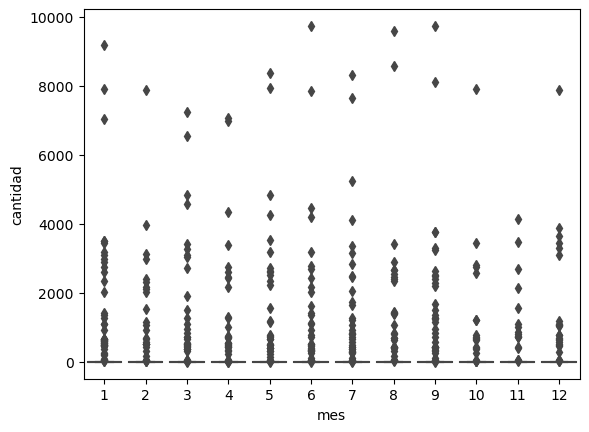

In [60]:
sns.boxplot(x="mes", y="cantidad", data=data)

* Los meses que mas se movio en cantidad

Text(0.5, 1.0, 'el mes que mas cantidad se movio')

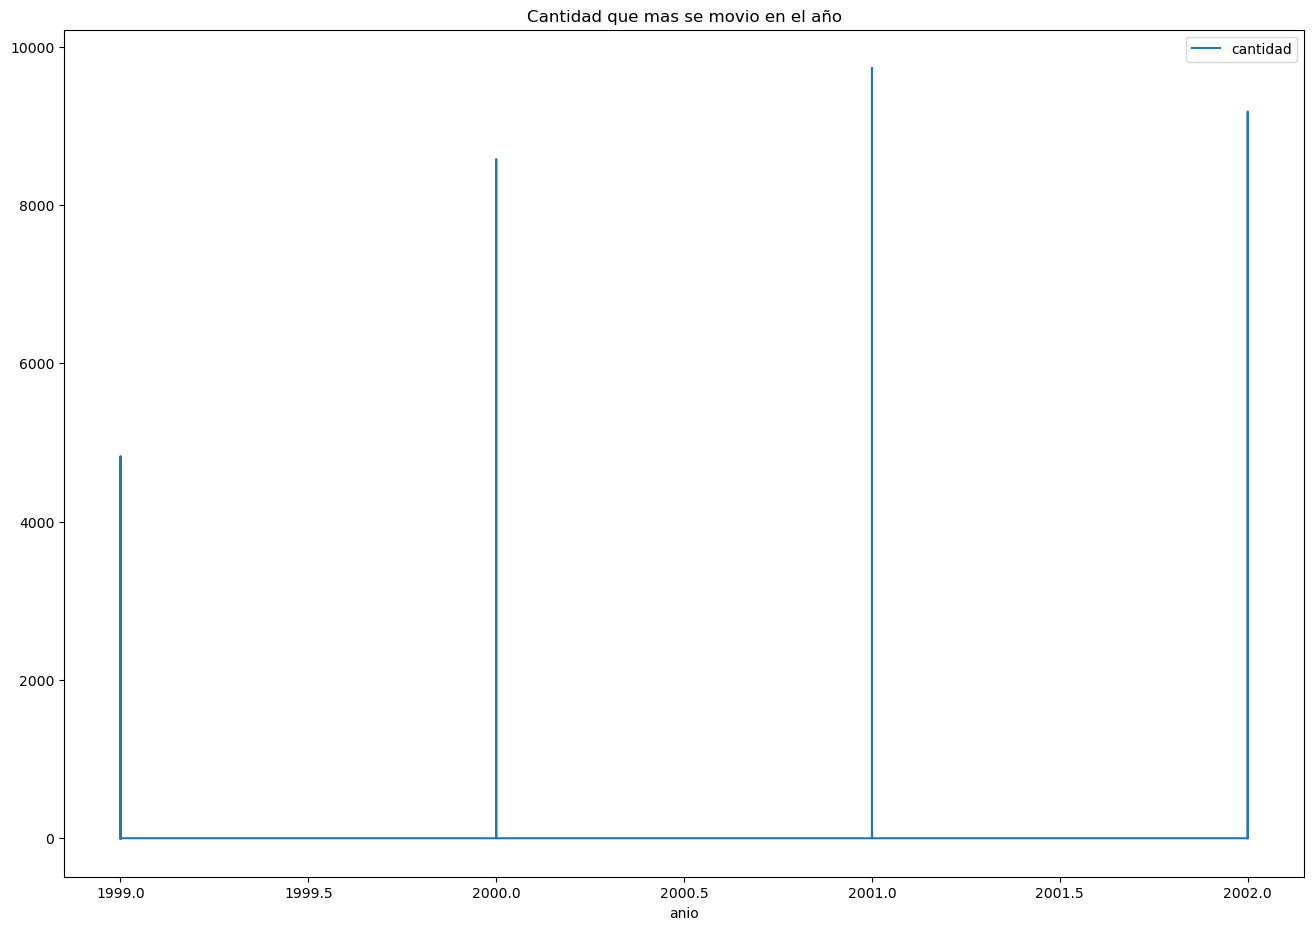

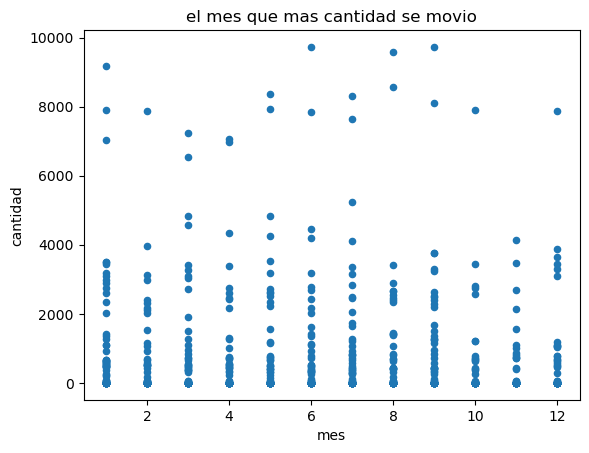

In [93]:

data.plot(x="anio", y="cantidad", figsize=(16,11))
plt.title("Cantidad que mas se movio en el año")

data.plot(kind="scatter" , x="mes", y="cantidad")
plt.title("el mes que mas cantidad se movio")

In [59]:
data.corr()

C:\Users\Acer\AppData\Local\Temp\ipykernel_16408\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,anio,mes,cantidad
anio,1.000000,-0.261603,0.038871
mes,-0.261603,1.000000,-0.001120
cantidad,0.038871,-0.001120,1.000000


In [84]:
data.describe() 

,anio,mes,cantidad
count,18505.000000,18505.000000,18504.000000
mean,1999.935693,5.956228,31.444389
std,0.835065,3.378540,352.126422
min,1999.000000,1.000000,0.000000
25%,1999.000000,3.000000,0.000000
50%,2000.000000,6.000000,0.000000
75%,2001.000000,9.000000,0.000000
max,2002.000000,12.000000,9729.000000


In [98]:
datagrouped1=(data.groupby(by=['mes']).sum("cantidad"))
datagrouped1.cantidad
dfMes=datagrouped1.cantidad/1000000
dfMes

mes
1     0.074104
2     0.038791
3     0.052958
4     0.045076
5     0.058529
6     0.055135
7     0.057521
8     0.052711
9     0.062296
10    0.027038
11    0.020934
12    0.036754
Name: cantidad, dtype: float64

In [103]:
data.sum().cantidad

581846.9674724

In [284]:
data1 = data[data["cantidad"] > 850]
data1.head(10)

,anio,mes,provincia,permisoconcesion,concepto,cantidad,fecha_data,is_train
238,1999,1,NEUQUÉN,RIO NEUQUEN,Mezclada con Crudo - Venta Interna,2592.70,1999-01-31,1
265,1999,1,NEUQUÉN,SIERRA CHATA [CHIHUIDOLS],Exportaciones,3509.00,1999-01-31,0
803,1999,2,NEUQUÉN,SIERRA CHATA [CHIHUIDOLS],Exportaciones,3957.00,1999-02-28,1
834,1999,2,NEUQUÉN,RIO NEUQUEN,Mezclada con Crudo - Venta Interna,2399.70,1999-02-28,0
1311,1999,3,NEUQUÉN,SIERRA CHATA [CHIHUIDOLS],Mercado Interno -No Combustible,4823.00,1999-03-31,1
1314,1999,3,NEUQUÉN,SIERRA CHATA [CHIHUIDOLS],Exportaciones,1110.00,1999-03-31,1
1317,1999,3,NEUQUÉN,RIO NEUQUEN,Mezclada con Crudo - Venta Interna,3041.68,1999-03-31,0
1811,1999,4,NEUQUÉN,RIO NEUQUEN,Mezclada con Crudo - Venta Interna,2428.29,1999-04-30,1
2462,1999,5,NEUQUÉN,RIO NEUQUEN,Mezclada con Crudo - Venta Interna,2228.99,1999-05-31,0
2581,1999,5,SANTA CRUZ,FARO VIRGENES,Mezclada con Crudo - Venta Interna,1144.00,1999-05-31,1


# CORRELACION  (cantidad y mes)

In [166]:
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.tree import DecisionTreeClassifier

In [157]:
data_cov = data.cov()
data_cov.loc["cantidad","mes"]

C:\Users\Acer\AppData\Local\Temp\ipykernel_16408\3303974150.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_cov = data.cov()


-1.3325731793481888

In [158]:
data_cant_cov = -1.3325731793481888
cant_std=352.126422
mes_std=3.378540

print("es una relacion casi Negativa por que el coeficiente de correlacion es =",data_cant_cov / (cant_std * mes_std))


es una relacion casi Negativa por que el coeficiente de correlacion es = -0.001120117001332832


In [179]:
data_cant = data[data["cantidad"] > 1]
data_cant

,anio,mes,provincia,permisoconcesion,concepto,cantidad,fecha_data,is_train
238,1999,1,NEUQUÉN,RIO NEUQUEN,Mezclada con Crudo - Venta Interna,2592.700,1999-01-31,1
265,1999,1,NEUQUÉN,SIERRA CHATA [CHIHUIDOLS],Exportaciones,3509.000,1999-01-31,0
268,1999,1,NEUQUÉN,BAJADA DEL PALO,Mezclada con Crudo - Venta Interna,20.000,1999-01-31,1
293,1999,1,NEUQUÉN,AGUADA DE LA ARENA (AÑELO),Mezclada con Crudo - Venta Interna,262.460,1999-01-31,0
318,1999,1,RÍO NEGRO,RIO NEUQUEN,Mezclada con Crudo - Venta Interna,666.100,1999-01-31,1
...,...,...,...,...,...,...,...,...
18400,2002,1,RÍO NEGRO,AGUA SALADA,Mezclada con Crudo - Venta Interna,631.900,2002-01-31,1
18424,2002,1,SALTA,AGUARAGÜE,Mezclada con Crudo - Venta Interna,9179.000,2002-01-31,1
18475,2002,1,SANTA CRUZ,FARO VIRGENES,Mezclada con Crudo - Venta Interna,481.000,2002-01-31,1
18487,2002,1,TIERRA DEL FUEGO,CUENCA MARINA AUSTRAL 1,Mezclada con Crudo - Venta Interna,3443.883,2002-01-31,1


# Creamos un arbol de decision para la distribucion de gasolina

(array([257.,   0.,  10.,   0.,   0.,  68.,   0.,  38.,   0.,   3.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

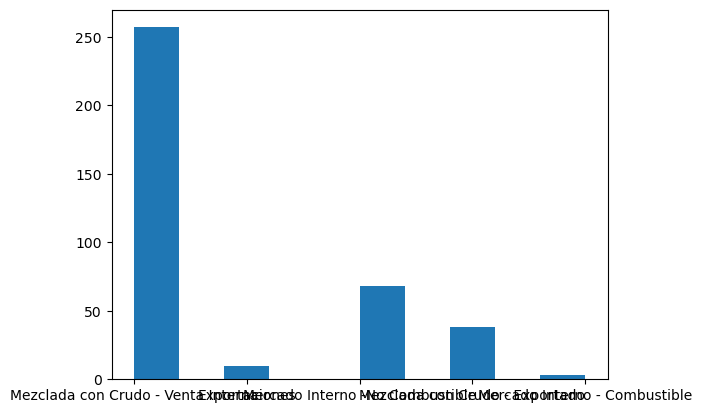

In [180]:
plt.hist(data_cant.concepto)

In [181]:
data_cant.concepto.unique()

array(['Mezclada con Crudo - Venta Interna', 'Exportaciones',
       'Mercado Interno -No Combustible',
       'Mezclada con Crudo - Exportado', 'Mercado Interno - Combustible'],
      dtype=object)

In [195]:
colnames = data_cant.columns.values.tolist()
predictor = colnames[5]
target = colnames[4]
print(predictor,target)

cantidad concepto


C:\Users\Acer\AppData\Local\Temp\ipykernel_16408\2540900009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cant["is_train"] = (np.random.uniform(0,1,len(data_cant))<=0.75).astype(int)


(array([ 91.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 285.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

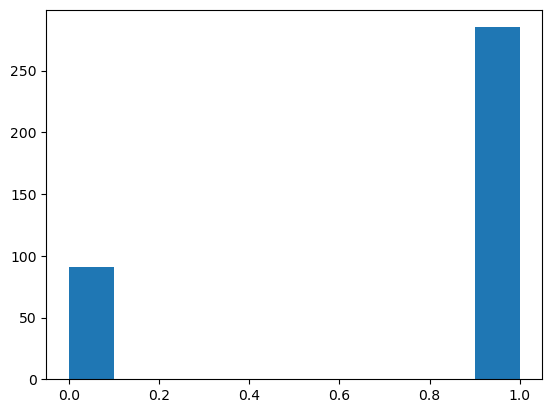

In [184]:
data_cant["is_train"] = (np.random.uniform(0,1,len(data_cant))<=0.75).astype(int)
plt.hist(data_cant.is_train)

In [185]:
train , test = data_cant[data_cant["is_train"]==True], data_cant[data_cant["is_train"]==False]

In [207]:
#Creamos el arbol de decision 
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=15 , random_state= 99)
#cree un fit con las variables predictoras "train" & el objetivo que esta en la variable "Target"
tree.fit(train[[predictor]],train[[target]])

DecisionTreeClassifier(criterion='entropy', min_samples_split=15,
                       random_state=99)

In [209]:
preds = tree.predict(test[[predictor]])

In [211]:
#Creamos una tabla para ver si el resultado de la prediccion usado por el arbol, si concuerda o no
pd.crosstab(test[target], preds,rownames=["Actual"], colnames=["Predictions"])

Predictions,Mercado Interno -No Combustible,Mezclada con Crudo - Exportado,Mezclada con Crudo - Venta Interna
Actual,,,
Exportaciones,0,0,1
Mercado Interno - Combustible,0,0,1
Mercado Interno -No Combustible,8,1,7
Mezclada con Crudo - Exportado,2,2,8
Mezclada con Crudo - Venta Interna,9,2,50


* Lo que podemos ver que para clasificar el **Mezclado con crudo - venta interna** lo hace muy bien, no sucede lo mismo con los demas conceptos.

In [218]:
tree.score(train[[predictor]], train[[target]])*100

82.10526315789474

* Como podemos ver el modelo de **Entrenamiento** tiene un acierto del 82.10% 


* para jerarquizar los productos de la categoría de manera secuencial fue bueno y tembien puede serlo, vender el Mezclado con crudo en ventas internas

In [222]:
tree.score(test[[predictor]],test[[target]])*100

65.93406593406593

* Como vemos no fue bastante bueno el modelo de **Testeo** tiene solamente un acierto del 65.93%

# Hacemos una validacion cruzada (creamos un nuevo arbol de decision para ver como se porta el modelo)

In [229]:
X = data_cant[[predictor]]

Y = data_cant[[target]]

In [230]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       random_state=99)

In [262]:
import sklearn.metrics
from sklearn.model_selection import KFold

In [263]:
cv = KFold(n_splits=19,shuffle=True, random_state=1)

In [265]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

score = np.mean(cross_val_score(tree,X,Y,scoring="accuracy",cv=cv, n_jobs=1))
score*100

72.85318559556787


Hicimos una validacion cruzada de 19 grupos y el score es el **PROMEDIO** de la eficacia obtenida en cada uno de los folds(las divisiones) es un **72.85%**

In [266]:
cross_val_score(tree,X,Y,scoring="accuracy",cv=cv, n_jobs=1)

array([0.9       , 0.7       , 0.75      , 0.8       , 0.65      ,
       0.55      , 0.7       , 0.85      , 0.5       , 0.8       ,
       0.75      , 0.85      , 0.75      , 0.65      , 0.8       ,
       0.63157895, 0.68421053, 0.73684211, 0.78947368])

* Podemos ver que varia mucho la efiacia de las folds (entre 90% y 50%) de acierto

In [273]:
#creamos un bucle RANGE desde 1 hasta 1, de uno en uno hasta llegar a 11 veces
#Para ver el mejor numero para n_splits

for i in range(1,15):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y) #aca creamos el arbol de X e Y
    cv = KFold(n_splits=10,shuffle=True, random_state=1) #usamos el mismo CV
    scores=cross_val_score(tree,X,Y,scoring="accuracy",cv=cv, n_jobs=1) #sacamos los valores de SCORES
    score=np.mean(scores) #aqui sacamos la media de SCORES
    print("score para i =", i , "es de ",score*100)

score para i = 1 es de  68.33570412517781
score para i = 2 es de  68.33570412517781
score para i = 3 es de  69.40256045519205
score para i = 4 es de  68.60597439544809
score para i = 5 es de  71.00284495021337
score para i = 6 es de  72.58890469416785
score para i = 7 es de  72.85917496443813
score para i = 8 es de  72.06258890469417
score para i = 9 es de  71.53627311522048
score para i = 10 es de  71.26600284495022
score para i = 11 es de  71.26600284495022
score para i = 12 es de  71.00284495021337
score para i = 13 es de  71.00284495021337
score para i = 14 es de  71.00284495021337


* La mejor opcion es 7 

# Haremos un random Forest 

In [277]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_jobs=2 , oob_score=True , n_estimators=100)
forest.fit(X,Y)

C:\Users\Acer\AppData\Local\Temp\ipykernel_16408\4080366176.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X,Y)


RandomForestClassifier(n_jobs=2, oob_score=True)

In [278]:
forest.oob_decision_function_

array([[0.        , 0.        , 0.        , 0.02777778, 0.97222222],
       [0.        , 0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       ...,
       [0.        , 0.        , 0.17948718, 0.23076923, 0.58974359],
       [0.03846154, 0.        , 0.96153846, 0.        , 0.        ],
       [0.02439024, 0.        , 0.        , 0.        , 0.97560976]])

In [279]:
forest.oob_score_

0.625

Obtenemos una precision muy baja de 62.5%. pero podemos ver en el anterior modelo que fue y sera lo que mas se vende u se vendio y tiene mas garantia de venta  **Mezclada con Crudo - Venta Interna.** 